# 4.3 Simulations and evaluation

### 1. Generate data without any noise, plot the resulting time series and split data into training, validation and test subsets

In [5]:
#Generating data
b = 0.2
g = 0.1
n = 10
tau = 25

def mackey_glass_generato(ini, end, b, g, n, tau):
    res = [1.5]

    for i in range(0, end):
        if i < tau:
            res.append(res[i] - g * res[i] )
        else:
            res.append(res[i] - g * res[i] + b * res[i - tau] / (1 + res[i - tau] ** n))

    return res[ini:end]


init_offset = -20
end_offset = 5

init = 301 
end = 1500 

time_series = mackey_glass_generato(init + init_offset, end + end_offset, b, g, n, tau)

raw_input = []
raw_output = []

for i in range(0, end - init):
    raw_input.append([time_series[i - 20], time_series[i - 15], time_series[i - 10], time_series[i - 5], time_series[i]])
    raw_output.append(time_series[i + 5])

print(time_series)
print(raw_input)
print(raw_output)


[0.894455496300665, 0.9210041638386977, 0.9370200426984308, 0.9441674065454709, 0.9440225667370514, 0.9380006658535759, 0.927308676901778, 0.9129114380687353, 0.8955238082501532, 0.875656522051265, 0.8537292047709524, 0.8302165085694599, 0.8057584284111853, 0.7812121478676817, 0.7576900422998312, 0.7366245563962684, 0.7198603609084644, 0.7097268296159521, 0.7089719084655544, 0.7203682082539361, 0.7458862526798494, 0.7856471138057912, 0.8370073263576152, 0.8941396078323711, 0.9492182519136559, 0.9956701935613437, 1.0308322701149537, 1.0557415651602364, 1.0733151730457458, 1.086800262129608, 1.0989850469988571, 1.1119203379514535, 1.1268792461869386, 1.1444160024521988, 1.1644657304873811, 1.1864567326770443, 1.2094284172099907, 1.232175641678291, 1.2534423175231777, 1.272145163570905, 1.2875732636299209, 1.2995221121837721, 1.3083560195305872, 1.315007435916529, 1.3208931490031741, 1.3276524673967005, 1.3365156940861551, 1.3470733749143893, 1.355594913182702, 1.3548342724292162, 1.33846

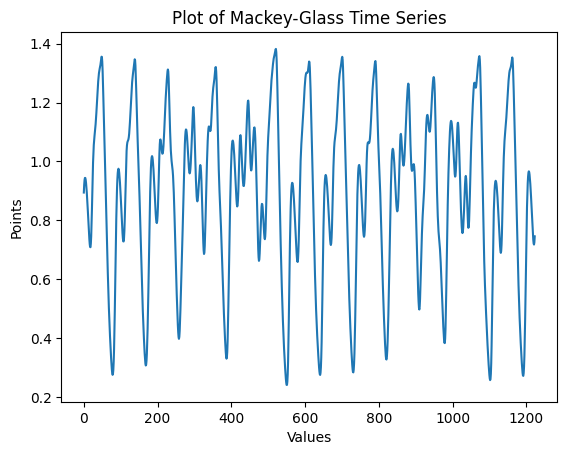

In [6]:
#Plot data
import matplotlib.pyplot as plt

plt.plot(time_series)

plt.xlabel('Values')
plt.ylabel('Points')
plt.title('Plot of Mackey-Glass Time Series')

plt.show()


In [7]:
#Split data
#       note: The exercise says to use 1200 points, from 301 to 1500, but this sum up to 1199 points

train_size = 750
test_size = 150
hold_out_size = 150
validation_size = 150

#Funciones solo necesarias si hay que añadir ruido a todos los datos
def split_input_data(data, train_size, hold_out_size, validation_size, test_size):
    train_X = data[:train_size]
    holdout_X = data[train_size : train_size + hold_out_size]
    validation_X = data[train_size + hold_out_size : train_size + hold_out_size + validation_size]
    test_X = data[train_size + hold_out_size + validation_size : train_size + hold_out_size + validation_size + test_size]

    return train_X, holdout_X, validation_X, test_X

def split_output_data(data, train_size, hold_out_size, validation_size, test_size):
    train_y = data[:train_size]
    holdout_y = data[train_size : train_size + hold_out_size]
    validation_y = data[train_size + hold_out_size : train_size + hold_out_size + validation_size]
    test_y = data[train_size + hold_out_size + validation_size : train_size + hold_out_size + validation_size + test_size]

    return train_y, holdout_y, validation_y, test_y

train_X = raw_input[:train_size]
holdout_X = raw_input[train_size:train_size+hold_out_size]
validation_X = raw_input[train_size + hold_out_size : train_size + hold_out_size + validation_size]
test_X = raw_input[train_size + hold_out_size + validation_size : train_size + hold_out_size + validation_size + test_size]

train_y = raw_output[:train_size]
holdout_y = raw_output[train_size : train_size + hold_out_size]
validation_y = raw_output[train_size + hold_out_size : train_size + hold_out_size + validation_size]
test_y = raw_output[train_size + hold_out_size + validation_size : train_size + hold_out_size + validation_size + test_size]

### 4.3.2 Propose a few configurations of a three-layer perceptron with different combinations of the number of nodes in the hidden layer and choose the most and least suitable architectures based on the validation error

In [3]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import time

Test model:

In [13]:
model = Sequential()

model.add(Dense(units=2, activation='sigmoid', input_dim=5))
model.add(Dense(units=2, activation='sigmoid'))

model.add(Dense(units=1, activation='linear'))

model.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam(learning_rate=0.01))

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

temp_time = time.time()
history = model.fit(train_X, train_y, validation_data=(validation_X, validation_y), epochs=1500, verbose=0, callbacks=[early_stopping])
temp_time = time.time() - temp_time

mse = model.evaluate(test_X, test_y, verbose=0)

hours, remainder = divmod(temp_time, 3600)
minutes, seconds = divmod(remainder, 60)
formatted_time = f"{int(hours):02d}:{int(minutes):02d}:{int(seconds):02d}"
print(f"Time elapsed (hh:mm:ss): {formatted_time}")
print(f"MSE: {mse:.6f} | first_layer_size: 2 | second_layer_size: 2 | learning_rate: 0.01 | Number of epochs:", len(history.history['loss']))


Time elapsed (hh:mm:ss): 00:00:16
MSE: 0.018528 | first_layer_size: 2 | second_layer_size: 2 | learning_rate: 0.01 | Number of epochs: 117


Main experiment:

In [18]:

iter_per_model = 5
first_layer_size_options = [3, 4, 5]
second_layer_size_options = [2, 4, 6]
learning_rate_options = [0.1, 0.01, 0.001, 0.0001]
max_epochs = 1500

            #error, first_layer_size, second_layer_size, learning_rate, model, average_training_time, average_number_of_epochs
best_case = [10000000000, 0, 0, 0, any, 0, 0]
worst_case = [0, 0, 0, 0, any, 0, 0]

single_training_average_time = 0
single_trainings = 0

start_time = time.time()

#  We will iterate over all possible combinations of number of neurons per layer and
# learning rate. Each model will be evaluated 5 times 
# and decided on the average of its MSE.
for first_layer_size in first_layer_size_options:
    for second_layer_size in second_layer_size_options:
        for learning_rate in learning_rate_options:
            average_mse = 0
            local_training_average_time = 0
            temp_time = 0
            average_epochs = 0

            # We will train each model iter_per_model times and average the results
            for i in range(0, iter_per_model):
                #Create model
                model = Sequential()
                model.add(Dense(units=first_layer_size, activation='sigmoid', input_dim=5))
                model.add(Dense(units=second_layer_size, activation='sigmoid'))
                model.add(Dense(units=1, activation='linear'))
                model.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate))
                early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

                #Train model
                temp_time = time.time()
                history = model.fit(train_X, train_y, validation_data=(holdout_X, holdout_y), epochs=max_epochs, verbose=0, callbacks=[early_stopping])
                temp_time = time.time() - temp_time

                #Evaluate model
                mse = model.evaluate(validation_X, validation_y, verbose=0)

                average_epochs += len(history.history['loss'])
                average_mse += mse
                local_training_average_time += temp_time
                single_trainings += 1

            #Average results
            average_mse /= iter_per_model
            local_training_average_time /= iter_per_model
            average_epochs /= iter_per_model

            #Set best and worst cases if needed
            if average_mse < best_case[0]:
                best_case = [average_mse, first_layer_size, second_layer_size, learning_rate, model, local_training_average_time, average_epochs]

            if average_mse > worst_case[0]:
                worst_case = [average_mse, first_layer_size, second_layer_size, learning_rate, model, local_training_average_time, average_epochs]

            single_training_average_time += temp_time

end_time = time.time()

elapsed_time = end_time - start_time
single_training_average_time /= single_trainings


# Print results
hours, remainder = divmod(elapsed_time, 3600)
minutes, seconds = divmod(remainder, 60)
formatted_time1 = f"{int(hours):02d}:{int(minutes):02d}:{int(seconds):02d}"
print(f"Time elapsed (hh:mm:ss): {formatted_time1}")
print(f"Number of models trained: {single_trainings}")

hours, remainder = divmod(single_training_average_time, 3600)
minutes, seconds = divmod(remainder, 60)
formatted_time2 = f"{int(hours):02d}:{int(minutes):02d}:{int(seconds):02d}"
print(f"Average time per model (hh:mm:ss): {formatted_time2}\n")

print("Best case average mse: ", best_case[0], "| first_layer_size: ", best_case[1], "| second_layer_size: ", best_case[2], "| learning_rate: ", best_case[3], "| average_training_time: ", best_case[5], "| average_number_of_epochs: ", best_case[6])
print("Worst case average mse: ", worst_case[0], "| first_layer_size: ", worst_case[1], "| second_layer_size: ", worst_case[2], "| learning_rate: ", worst_case[3], "| average_training_time: ", worst_case[5], "| average_number_of_epochs: ", worst_case[6])                         
        


Time elapsed (hh:mm:ss): 04:02:07
Number of models trained: 180
Average time per model (hh:mm:ss): 00:00:16

Best case average mse:  0.0013391255401074887 | first_layer_size:  5 | second_layer_size:  4 | learning_rate:  0.1 | average_training_time:  8.259656763076782 | average_number_of_epochs:  75.2
Worst case average mse:  0.022229235246777536 | first_layer_size:  3 | second_layer_size:  2 | learning_rate:  0.0001 | average_training_time:  157.57492942810057 | average_number_of_epochs:  1205.2


Save both models:

In [21]:
from datetime import datetime
import os

#Get current date and time
current_date = datetime.now().strftime("%Y_%m_%d_%H_%M_%S")

#Create folder and path
current_directory = os.getcwd()

folder_name = f"models"

if not os.path.exists(folder_name):
    os.makedirs(folder_name)

subfolder_name = os.path.join(folder_name, current_date)

if not os.path.exists(subfolder_name):
    os.makedirs(subfolder_name)
    
file_best = f"best_model.keras"
file_worst = f"worst_model.keras"


full_path_best  = os.path.join(subfolder_name, file_best)
full_path_worst  = os.path.join(subfolder_name, file_worst)

#Save models
best_case[4].save(full_path_best)
worst_case[4].save(full_path_worst)

#Save experiment results
file_result = "result.txt"
full_path_result = os.path.join(subfolder_name, file_result)

file = open(full_path_result, "w")
print(f"Time elapsed (hh:mm:ss): {formatted_time1}", file=file)
print(f"Number of models trained: {single_trainings}", file=file)
print(f"Average time per model (hh:mm:ss): {formatted_time2}\n", file=file)

print(f"Parameters: ", file=file)
print(f"Iters per model = {iter_per_model}", file=file)
print(f"First layer size options = {first_layer_size_options}", file=file)
print(f"Second layer size options = {second_layer_size_options}", file=file)
print(f"Learning rate options = {learning_rate_options}", file=file)
print(f"Max epochs = {max_epochs}\n", file=file)

print("Best case average mse: ", best_case[0], "| first_layer_size: ", best_case[1], "| second_layer_size: ", best_case[2], "| learning_rate: ", best_case[3], "| average_training_time: ", best_case[5], "| average_number_of_epochs: ", best_case[6], file=file)
print("Worst case average mse: ", worst_case[0], "| first_layer_size: ", worst_case[1], "| second_layer_size: ", worst_case[2], "| learning_rate: ", worst_case[3], "| average_training_time: ", worst_case[5], "| average_number_of_epochs: ", worst_case[6], file=file)                         
        
file.close()



Plot both models:

5/5 [==============================] - 0s 2ms/step


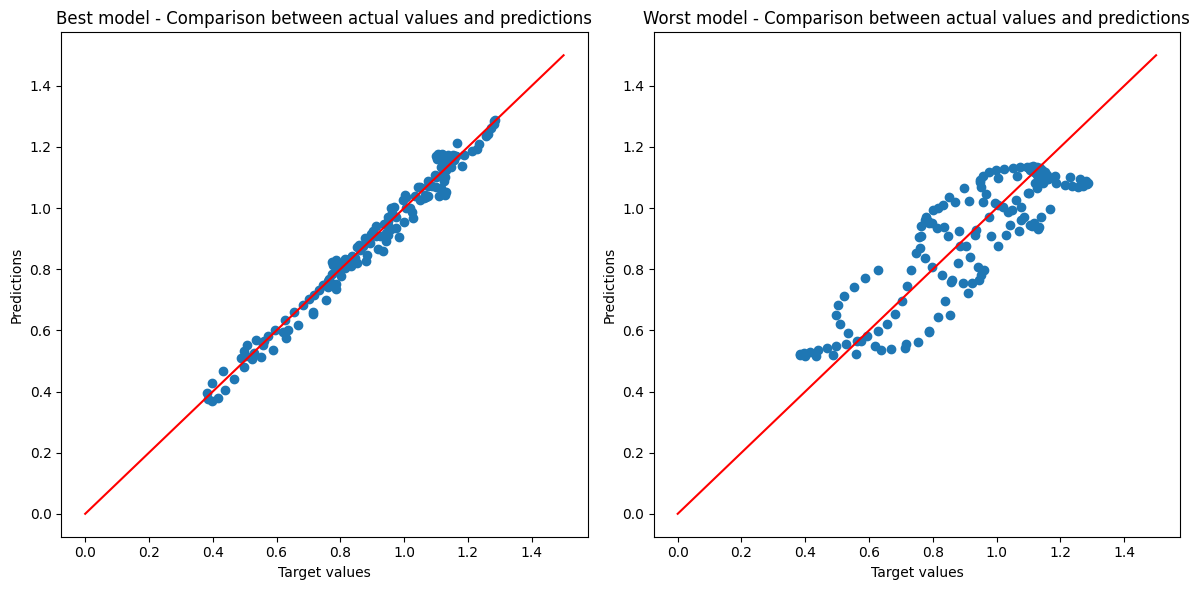

In [25]:
# y_pred = model.predict(test_X)
y_pred_best = best_case[4].predict(validation_X)
y_pred_worst = worst_case[4].predict(validation_X)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(validation_y, y_pred_best)
plt.xlabel("Target values")
plt.ylabel("Predictions")
plt.title("Best model - Comparison between actual values and predictions")

x_line = np.linspace(0, 1.5, 100) 
y_line = x_line 

plt.plot(x_line, y_line, color='red', linestyle='-')         

plt.subplot(1, 2, 2)
plt.scatter(validation_y, y_pred_worst)
plt.xlabel("Target values")
plt.ylabel("Predictions")
plt.title("Worst model - Comparison between actual values and predictions")
plt.plot(x_line, y_line, color='red', linestyle='-')         

plt.tight_layout()


plt.show()

Checking robusnes of both motdels, comparing 5 diferent executions:

In [49]:
import numpy as np

iters_test = 20

print(f"Starting best model evaluation:")

x_line = np.linspace(0, 1.5, 100) 
y_line = x_line 

best_model_res = []
worst_model_res = []

best_model_predictions = []
worst_model_predictions = []

# We will train each model iter_per_model times 
for i in range(0, iters_test):
    #Create model
    model = Sequential()
    model.add(Dense(units=best_case[1], activation='sigmoid', input_dim=5))
    model.add(Dense(units=best_case[2], activation='sigmoid'))
    model.add(Dense(units=1, activation='linear'))
    model.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam(learning_rate=best_case[3]))
    early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

    history = model.fit(train_X, train_y, validation_data=(holdout_X, holdout_y), epochs=max_epochs, verbose=0, callbacks=[early_stopping])

    #Evaluate model
    mse = model.evaluate(validation_X, validation_y, verbose=0)
    best_model_res.append(mse)
    print(f"\tIteration {i+1} MSE: {mse}")

    y_pred = model.predict(validation_X, verbose=0)
    best_model_predictions.append(y_pred)

print("\n")
print(f"Starting worst model evaluation:")

for i in range(0, iters_test):
    #Create model
    model = Sequential()
    model.add(Dense(units=worst_case[1], activation='sigmoid', input_dim=5))
    model.add(Dense(units=worst_case[2], activation='sigmoid'))
    model.add(Dense(units=1, activation='linear'))
    model.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam(learning_rate=worst_case[3]))
    early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

    history = model.fit(train_X, train_y, validation_data=(holdout_X, holdout_y), epochs=max_epochs, verbose=0, callbacks=[early_stopping])

    #Evaluate model
    mse = model.evaluate(validation_X, validation_y, verbose=0)
    worst_model_res.append(mse)
    print(f"\tIteration {i+1} MSE: {mse}")

    y_pred = model.predict(validation_X, verbose=0)
    worst_model_predictions.append(y_pred)

best_model_mean = np.mean(best_model_res)
worst_model_mean = np.mean(worst_model_res)
best_model_var = np.var(best_model_res)
worst_model_var = np.var(worst_model_res)
print("\nBest model results: ", best_model_res)
print("Worst model results: ", worst_model_res)
print(f"Best model mean: {best_model_mean}")
print(f"Best model variance: {best_model_var}")
print(f"Worst model mean: {worst_model_mean}")
print(f"Worst model variance: {worst_model_var}")

Starting best model evaluation:
	Iteration 1 MSE: 0.0013152782339602709
	Iteration 2 MSE: 0.00194368080701679
	Iteration 3 MSE: 0.0017635616241022944
	Iteration 4 MSE: 0.001639623660594225
	Iteration 5 MSE: 0.001940254122018814
	Iteration 6 MSE: 0.001670733094215393
	Iteration 7 MSE: 0.001703564077615738
	Iteration 8 MSE: 0.002124759601429105
	Iteration 9 MSE: 0.0015338810626417398
	Iteration 10 MSE: 0.001111555495299399
	Iteration 11 MSE: 0.0017100356053560972
	Iteration 12 MSE: 0.001275711809284985
	Iteration 13 MSE: 0.0019884933717548847
	Iteration 14 MSE: 0.054682329297065735
	Iteration 15 MSE: 0.0019360820297151804
	Iteration 16 MSE: 0.0012112046824768186
	Iteration 17 MSE: 0.001486114808358252
	Iteration 18 MSE: 0.0014359453925862908
	Iteration 19 MSE: 0.001523102866485715
	Iteration 20 MSE: 0.0012865577591583133


Starting worst model evaluation:
	Iteration 1 MSE: 0.015921583399176598
	Iteration 2 MSE: 0.011334327049553394
	Iteration 3 MSE: 0.05238975211977959
	Iteration 4 MSE: 

How robust are the most and least suitable architectures, which you have
identified, with respect to random weight initialisation?



### 4.3.3 Report the test performance for the two architectures.

Best model MSE: 0.0008988434565253556
Worst model MSE: 0.021668292582035065


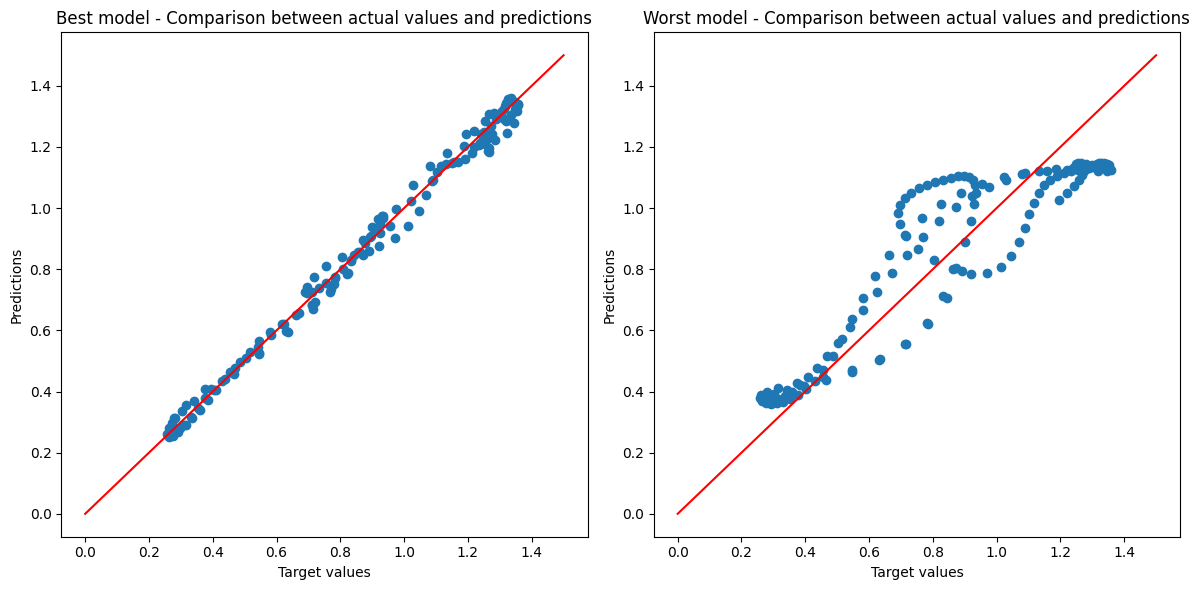

In [50]:
mse_best = best_case[4].evaluate(test_X, test_y, verbose=0)
print(f"Best model MSE: {mse_best}")
mse_worst = worst_case[4].evaluate(test_X, test_y, verbose=0)
print(f"Worst model MSE: {mse_worst}")

y_pred_best = best_case[4].predict(test_X, verbose=0)
y_pred_worst = worst_case[4].predict(test_X, verbose=0)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(test_y, y_pred_best)
plt.xlabel("Target values")
plt.ylabel("Predictions")
plt.title("Best model - Comparison between actual values and predictions")

x_line = np.linspace(0, 1.5, 100) 
y_line = x_line 

plt.plot(x_line, y_line, color='red', linestyle='-')         

plt.subplot(1, 2, 2)
plt.scatter(test_y, y_pred_worst)
plt.xlabel("Target values")
plt.ylabel("Predictions")
plt.title("Worst model - Comparison between actual values and predictions")
plt.plot(x_line, y_line, color='red', linestyle='-')         

plt.tight_layout()

plt.show()

### 4.3.4 Add zero-mean Gaussan noise to training data to simulate a more challenging real-world scenario.

In [18]:
import os
path = os.path.abspath('C:\\Users\\pablo\\Desktop\\Carrera Inf\\4º de carrera\\ANN and DA\\LAB\\ANNandDAlabs\\Lab1b\\models\\2023_09_14_19_41_11\\best_model.keras')
modelo = tf.keras.models.load_model(path)
best_case = [0.0013391255401074887, 5, 4, 0.1, modelo, 8.259656763076782, 75.2]

path = os.path.abspath('C:\\Users\\pablo\\Desktop\\Carrera Inf\\4º de carrera\\ANN and DA\\LAB\\ANNandDAlabs\\Lab1b\\models\\2023_09_14_19_41_11\\worst_model.keras')
modelo = tf.keras.models.load_model(path)
worst_case = [0.022229235246777536, 3, 2, 0.0001, modelo, 157.57492942810057, 1205.2]

In [2]:
from datetime import datetime
import os
def add_zero_mean_noise(desviation, data_set):
    noise = np.random.normal(0, desviation, size=(len(data_set), 5)).astype(float)
    noisy_data_set = (data_set + noise).tolist()
    return noisy_data_set

def save(best_case, worst_case, models):
    #Get current date and time
    current_date = datetime.now().strftime("%Y_%m_%d_%H_%M_%S")
    current_date = "noise_" + current_date
    #Create folder and path
    current_directory = os.getcwd()

    folder_name = f"models"

    if not os.path.exists(folder_name):
        os.makedirs(folder_name)

    subfolder_name = os.path.join(folder_name, current_date)

    if not os.path.exists(subfolder_name):
        os.makedirs(subfolder_name)
        
    file_best = f"best_model.keras"
    file_worst = f"worst_model.keras"


    full_path_best  = os.path.join(subfolder_name, file_best)
    full_path_worst  = os.path.join(subfolder_name, file_worst)

    #Save models
    best_case[4].save(full_path_best)
    worst_case[4].save(full_path_worst)

    #Save experiment results
    file_result = "result.txt"
    full_path_result = os.path.join(subfolder_name, file_result)

    file = open(full_path_result, "w")
    print(f"Time elapsed (hh:mm:ss): {formatted_time1}", file=file)
    print(f"Number of models trained: {single_trainings}", file=file)
    print(f"Average time per model (hh:mm:ss): {formatted_time2}\n", file=file)

    print(f"Parameters: ", file=file)
    print(f"Iters per model = {iter_per_model}", file=file)
    print(f"First layer size options = {first_layer_size}", file=file)
    print(f"Second layer size options = {second_layer_size_options}", file=file)
    print(f"Learning rate options = {learning_rate}", file=file)
    print(f"Regularization parameter options = {reg_parameter_options}", file=file)
    print(f"Noise desviation options = {desviation_options}", file=file)
    print(f"Max epochs = {max_epochs}\n", file=file)

    print("Best case average mse: ", best_case[0], "| first_layer_size: ", first_layer_size, "| second_layer_size: ", best_case[1], "| learning_rate: ", learning_rate, "| reg_parameter: ", best_case[2], "| noise_desviation: ", best_case[3], "| average_training_time: ", best_case[5], "| average_number_of_epochs: ", best_case[6], file=file)
    print("Worst case average mse: ", worst_case[0], "| first_layer_size: ", first_layer_size, "| second_layer_size: ", worst_case[1], "| learning_rate: ", learning_rate, "| reg_parameter: ", best_case[2], "| noise_desviation: ", best_case[3], "| average_training_time: ", worst_case[5], "| average_number_of_epochs: ", worst_case[6], file=file)                         
            
    print("\n -------------------All models------------------- \n", file=file)
    for model in models:
        print(f"Best case average mse: ", model[0], "| first_layer_size: ", first_layer_size, "| second_layer_size: ", model[1], "| learning_rate: ", learning_rate, "| reg_parameter: ", model[2], "| noise_desviation: ", model[3], "| average_training_time: ", model[5], "| average_number_of_epochs: ", model[6], file=file)
        

    file.close()

In [19]:
from datetime import datetime
import os
best_case = [0.0013391255401074887, 5, 4, 0.1, any, 8.259656763076782, 75.2]
worst_case = [0.022229235246777536, 3, 2, 0.0001, any, 157.57492942810057, 1205.2]    

iter_per_model = 5
max_epochs = 3000
first_layer_size = best_case[1]
learning_rate = best_case[3]
second_layer_size_options = [3, 6, 9]
reg_parameter_options = [0.1, 0.01, 0.001]
desviation_options = [0.05, 0.15]

            #error, second_layer_size, reg_parameter, noise_desviation, model, average_training_time, average_number_of_epochs

best_case = [[10000000000, 0, 0, 0, any, 0, 0], [10000000000, 0, 0, 0, any, 0, 0]]
worst_case = [[0, 0, 0, 0, any, 0, 0], [0, 0, 0, 0, any, 0, 0]]
models = []
counter = 0

for desviation in desviation_options:
    start_time = time.time()



    single_training_average_time = 0
    single_trainings = 0

    noisy_data_sets = []

    # Adding random zero-mean Gaussan noise
    noisy_train_X = add_zero_mean_noise(desviation, train_X)
    noisy_holdout_X = add_zero_mean_noise(desviation, holdout_X)
    noisy_validation_X = add_zero_mean_noise(desviation, validation_X)
    noisy_test_X = add_zero_mean_noise(desviation, test_X)

    noisy_data_sets.append((desviation, noisy_test_X, noisy_holdout_X, noisy_validation_X, noisy_test_X))
    for second_layer_size in second_layer_size_options:
        for reg_parameter in reg_parameter_options:
            average_mse = 0
            local_training_average_time = 0
            temp_time = 0
            average_epochs = 0

            # We will train each model iter_per_model times and average the results
            for i in range(0, iter_per_model):
                #Create model
                model = Sequential()
                model.add(Dense(units=first_layer_size, activation='sigmoid', input_dim=5, kernel_regularizer=tf.keras.regularizers.l2(reg_parameter)))
                model.add(Dense(units=second_layer_size, activation='sigmoid', kernel_regularizer=tf.keras.regularizers.l2(reg_parameter)))
                model.add(Dense(units=1, activation='linear', kernel_regularizer=tf.keras.regularizers.l2(reg_parameter)))
                model.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate))

                #Train model
                temp_time = time.time()
                history = model.fit(list(noisy_train_X), train_y, validation_data=(holdout_X, holdout_y), epochs=max_epochs, verbose=0)
                temp_time = time.time() - temp_time

                #Evaluate model
                mse = model.evaluate(validation_X, validation_y, verbose=0)

                average_epochs += len(history.history['loss'])
                average_mse += mse
                local_training_average_time += temp_time
                single_trainings += 1

            #Average results
            average_mse /= iter_per_model
            local_training_average_time /= iter_per_model
            average_epochs /= iter_per_model

            #Set best and worst cases if needed
            if average_mse < best_case[counter][0]:
                best_case[counter] = [average_mse, second_layer_size, reg_parameter, desviation, model, local_training_average_time, average_epochs]

            if average_mse > worst_case[counter][0]:
                worst_case[counter] = [average_mse, second_layer_size, reg_parameter, desviation, model, local_training_average_time, average_epochs]

            single_training_average_time += temp_time

            models.append([average_mse, second_layer_size, reg_parameter, desviation, model, local_training_average_time, average_epochs])
      
    end_time = time.time()

    elapsed_time = end_time - start_time
    single_training_average_time /= single_trainings


    # Print results
    hours, remainder = divmod(elapsed_time, 3600)
    minutes, seconds = divmod(remainder, 60)
    formatted_time1 = f"{int(hours):02d}:{int(minutes):02d}:{int(seconds):02d}"
    print(f"Time elapsed (hh:mm:ss): {formatted_time1}")
    print(f"Number of models trained: {single_trainings}")

    hours, remainder = divmod(single_training_average_time, 3600)
    minutes, seconds = divmod(remainder, 60)
    formatted_time2 = f"{int(hours):02d}:{int(minutes):02d}:{int(seconds):02d}"
    print(f"Average time per model (hh:mm:ss): {formatted_time2}\n")

    print("Best case average mse: ", best_case[counter][0], " | first_layer_size: ", first_layer_size, "| second_layer_size: ", best_case[counter][1], "| reg_parameter: ", best_case[counter][2], "| noise_desviation: ", best_case[counter][3], "| average_training_time: ", best_case[counter][5], "| average_number_of_epochs: ", best_case[counter][6])
    print("Worst case average mse: ", worst_case[counter][0], " | first_layer_size: ", first_layer_size, "| second_layer_size: ", worst_case[counter][1], "| reg_parameter: ", worst_case[counter][2], "| noise_desviation: ", worst_case[counter][3], "| average_training_time: ", worst_case[counter][5], "| average_number_of_epochs: ", worst_case[counter][6])                         
    try:
        save(best_case=best_case[counter], worst_case=worst_case[counter], models=models)
    except Exception as ex:
        print("Error saving model")
    counter += 1  
    print("\n\n")




KeyboardInterrupt: 

0
5/5 [==============================] - 0s 2ms/step


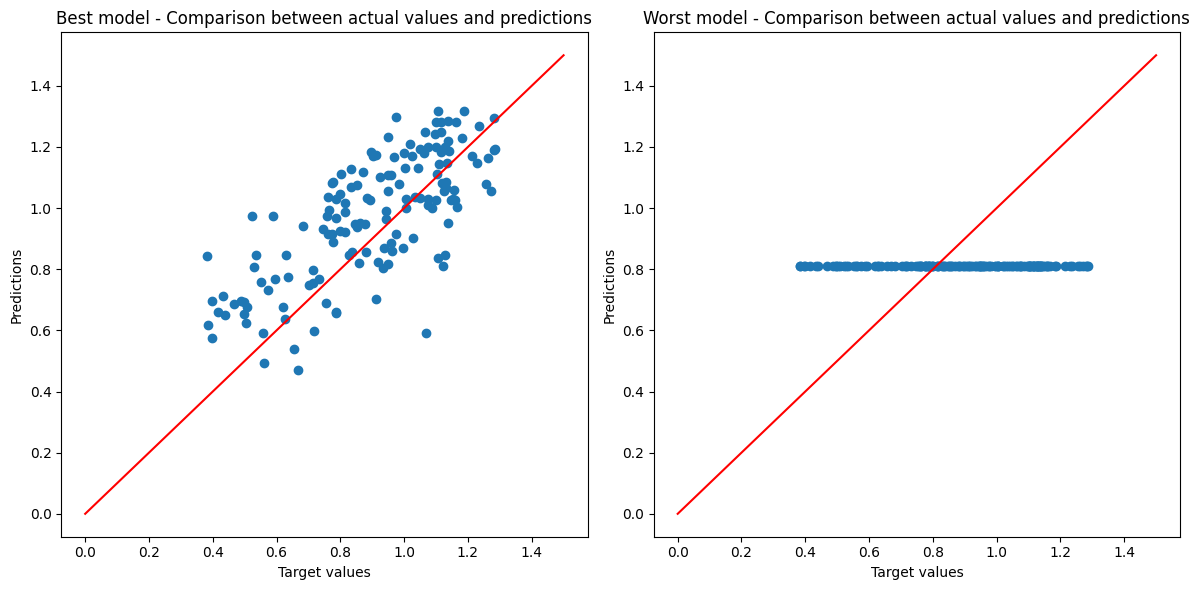

1
5/5 [==============================] - 0s 2ms/step


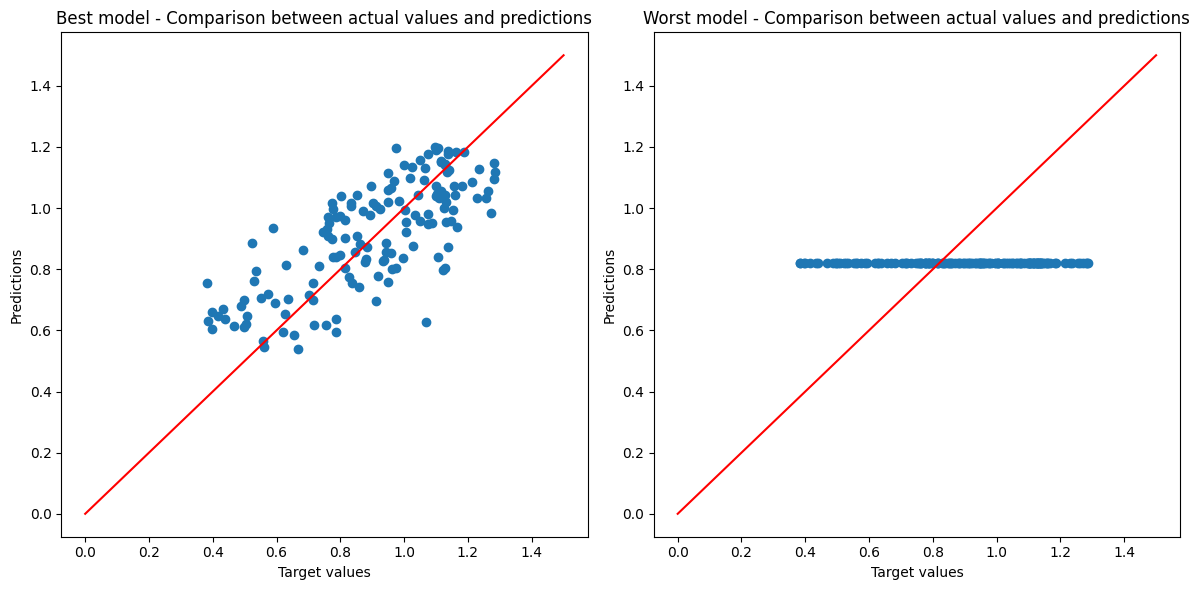

In [18]:
#Este codigo esta listo en principio
for i in range (0,2):
    print(i)  

    y_pred_best = best_case[i][4].predict(noisy_validation_X)
    y_pred_worst = worst_case[i][4].predict(noisy_validation_X)

    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.scatter(validation_y, y_pred_best)
    plt.xlabel("Target values")
    plt.ylabel("Predictions")
    plt.title("Best model - Comparison between actual values and predictions")

    x_line = np.linspace(0, 1.5, 100) 
    y_line = x_line 

    plt.plot(x_line, y_line, color='red', linestyle='-')         

    plt.subplot(1, 2, 2)
    plt.scatter(validation_y, y_pred_worst)
    plt.xlabel("Target values")
    plt.ylabel("Predictions")
    plt.title("Worst model - Comparison between actual values and predictions")
    plt.plot(x_line, y_line, color='red', linestyle='-')         

    plt.tight_layout()

    plt.show()